In [43]:
import pandas as pd
import numpy as np

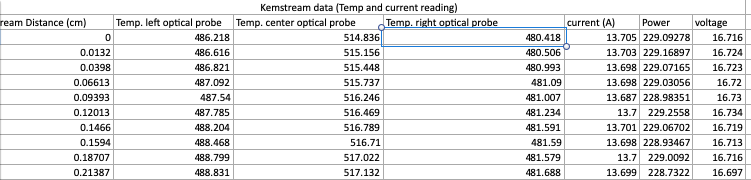

In [44]:
df2 = pd.read_excel (r'/Users/shikhathakur/Downloads/297_4_20m_tape.xlsx', sheet_name='297-4', header= None)
print (df2.head(3))

                                          0                         1   \
0  Kemstream data (Temp and current reading)                       NaN   
1                    Kimstream Distance (cm)  Temp. left optical probe   
2                                          0                   486.218   

                           2                          3            4   \
0                         NaN                        NaN          NaN   
1  Temp. center optical probe  Temp. right optical probe  current (A)   
2                     514.836                    480.418       13.705   

        5        6   7                              8        9           10  \
0      NaN      NaN NaN  Kemstream data (Flow reading)      NaN         NaN   
1    Power  voltage NaN                  Distance (cm)  gasflow  liquidflow   
2  229.093   16.716 NaN                         0.0042    662.8       3.603   

       11         12  13                         14         15  
0     NaN        NaN NaN  SH

The data file picked up is shown above, The data columns have pre-heading, so firstly the data header is set agan.

In [45]:
df2.columns
data2= df2


new_header2 = df2.iloc[1]
data2=df2[2:]
data2.columns = new_header2

data2.head()

1,Kimstream Distance (cm),Temp. left optical probe,Temp. center optical probe,Temp. right optical probe,current (A),Power,voltage,NaN,Distance (cm),gasflow,liquidflow,tongas,tonliquid,NaN,SHPM Distance (cm),SHPM (IC)
2,0,486.218,514.836,480.418,13.705,229.093,16.716,NaN,0.0042,662.8,3.603,13.648,23.55,NaN,0,8.85499
3,0.0132,486.616,515.156,480.506,13.703,229.169,16.724,NaN,0.0209333,663,3.604,13.652,23.55,NaN,0.10886,10.1794
4,0.0398,486.821,515.448,480.993,13.698,229.072,16.723,NaN,0.0384667,663.6,3.61,13.656,23.528,NaN,0.21771,9.96844
5,0.06613,487.092,515.737,481.09,13.698,229.031,16.72,NaN,0.0562,664.4,3.619,13.662,23.494,NaN,0.32657,10.5387
6,0.09393,487.54,516.246,481.007,13.687,228.984,16.73,NaN,0.0733333,665,3.622,13.664,23.478,NaN,0.43543,10.7983


In [52]:
pip install missingno

Note: you may need to restart the kernel to use updated packages.


# Visualising Missing Values 


<AxesSubplot:>

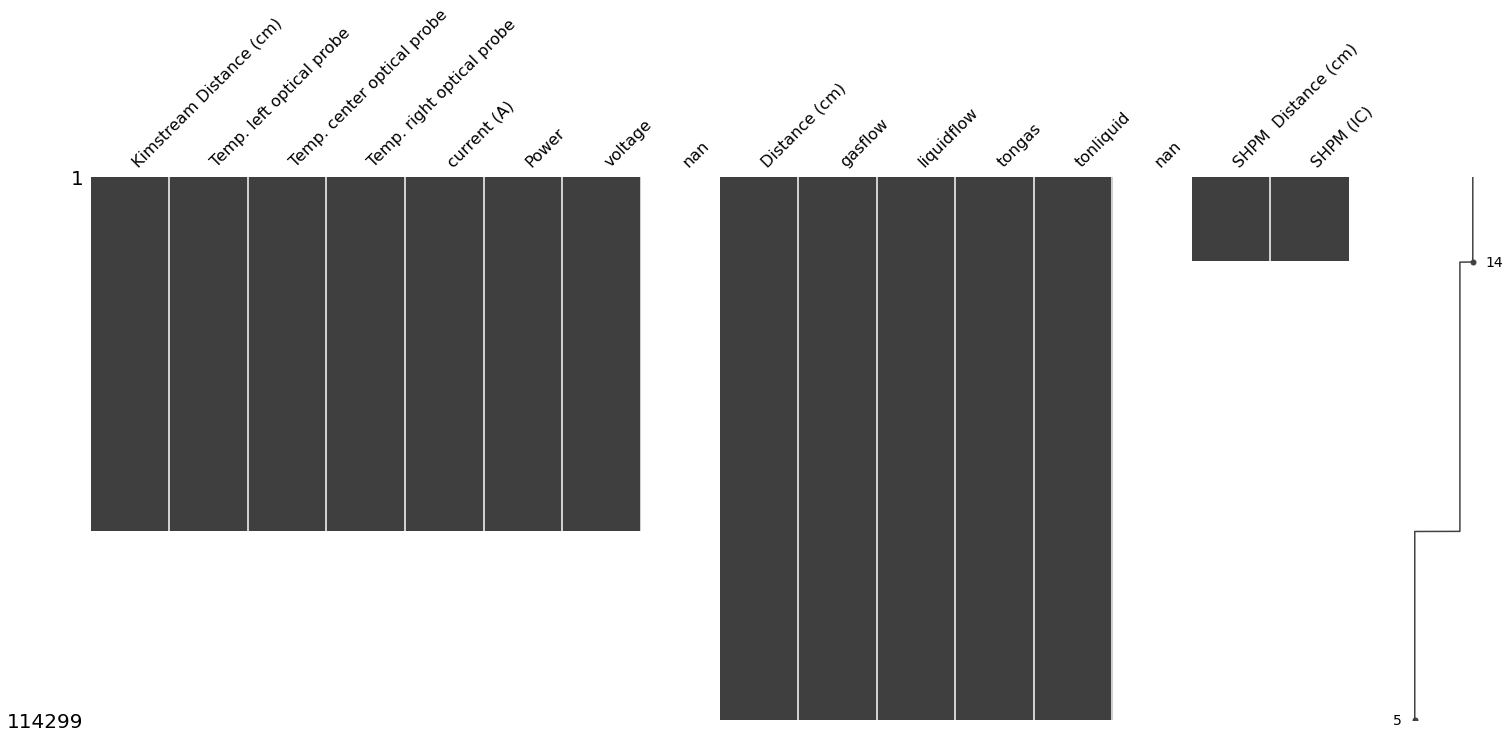

In [53]:
import pandas as pd
import missingno as msno
  
# Loading the dataset
df = data2
  
# Visualize missing values as a matrix
msno.matrix(df)

In [46]:
print(data2.shape)

(114299, 16)


Creating a seprate daatframe for the first 7 columns, because data columns seems to have relevance with each other, also total null values fromeach column seems to be missing

In [47]:
D = data2.iloc[:,:7]
print(D.head())
D.isna().sum()

1 Kimstream Distance (cm) Temp. left optical probe Temp. center optical probe  \
2                       0                  486.218                    514.836   
3                  0.0132                  486.616                    515.156   
4                  0.0398                  486.821                    515.448   
5                 0.06613                  487.092                    515.737   
6                 0.09393                   487.54                    516.246   

1 Temp. right optical probe current (A)    Power voltage  
2                   480.418      13.705  229.093  16.716  
3                   480.506      13.703  229.169  16.724  
4                   480.993      13.698  229.072  16.723  
5                    481.09      13.698  229.031   16.72  
6                   481.007      13.687  228.984   16.73  


1
Kimstream Distance (cm)       39702
Temp. left optical probe      39702
Temp. center optical probe    39702
Temp. right optical probe     39702
current (A)                   39702
Power                         39702
voltage                       39702
dtype: int64

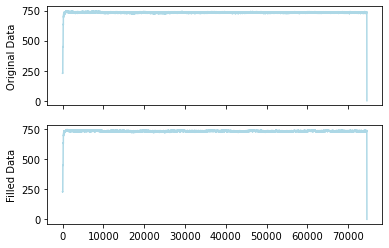

39702


In [56]:
#Lets see the nan values 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(1977)



# Set every third value to NaN
x=D['Power']

# Set a few bigger gaps...


# Use pandas with a limited forward fill
# You may want to adjust the `limit` here. This will fill 2 nan gaps.
filled = pd.Series(x).fillna(limit=2, method='ffill')

# Let's plot the results
fig, axes = plt.subplots(nrows=2, sharex=True)
axes[0].plot(x, color='lightblue')
axes[1].plot(filled, color='lightblue')

axes[0].set(ylabel='Original Data')
axes[1].set(ylabel='Filled Data')

plt.show()
print(x.isna().sum())

<AxesSubplot:xlabel='1', ylabel='1'>

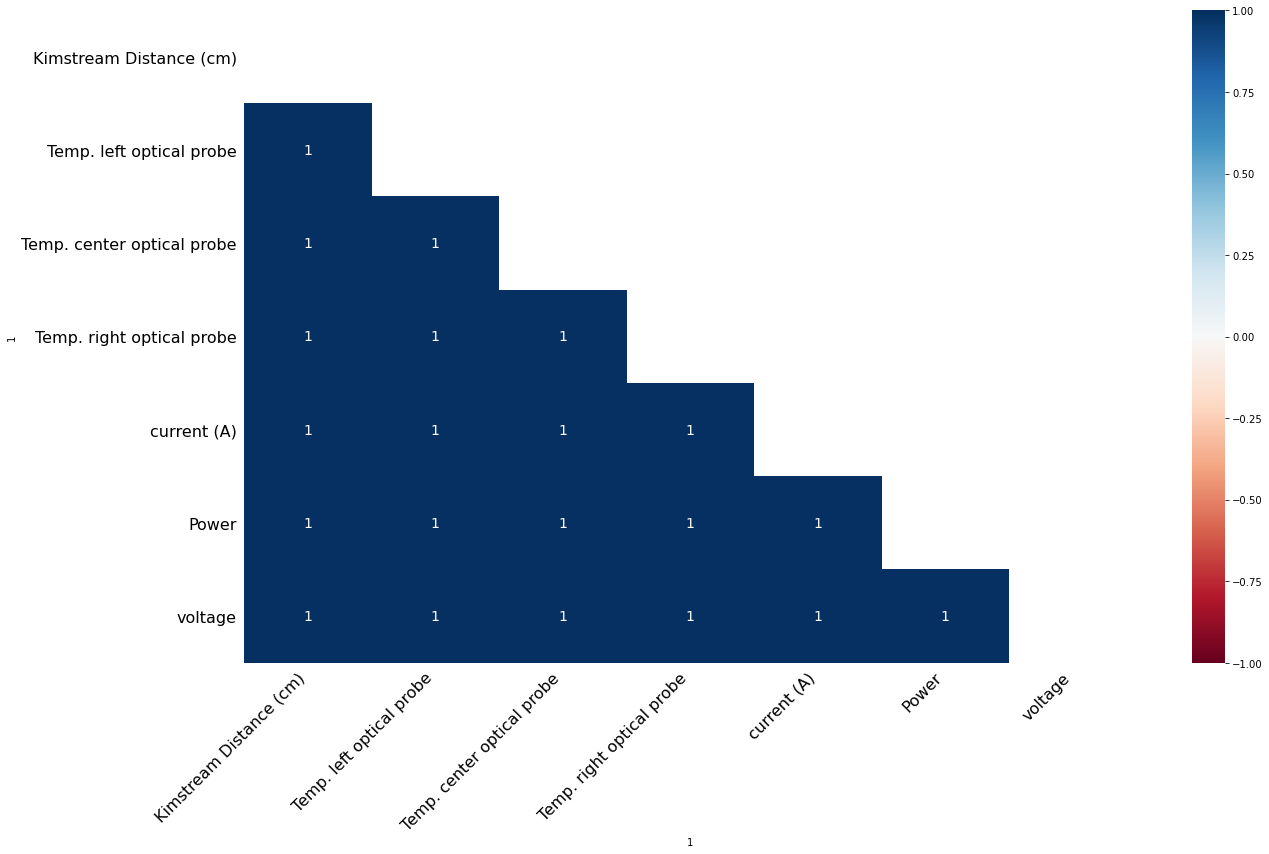

In [54]:
msno.heatmap(D)

In [91]:
D['Kimstream Distance (cm)'].max()

1982.40087

We can either drop the null values or can ,
We are doing both ways ,
In the datafraem 'DD', null values are dropped, about 39k vere null values, so we are uding data frame DD which only have 74597 values left

WHile in the original datafraem D, we are fillinf the null values.


In [79]:
DD = D.dropna()
print(D.shape)
print(DD.shape)
DD.isna().sum()

(114299, 7)
(74597, 7)


1
Kimstream Distance (cm)       0
Temp. left optical probe      0
Temp. center optical probe    0
Temp. right optical probe     0
current (A)                   0
Power                         0
voltage                       0
dtype: int64

/Applications/anaconda3/lib/python3.7/site-packages/seaborn/matrix.py:311: UserWarning: Attempting to set identical left == right == 0 results in singular transformations; automatically expanding.
  ax.set(xlim=(0, self.data.shape[1]), ylim=(0, self.data.shape[0]))
/Applications/anaconda3/lib/python3.7/site-packages/seaborn/matrix.py:311: UserWarning: Attempting to set identical bottom == top == 0 results in singular transformations; automatically expanding.
  ax.set(xlim=(0, self.data.shape[1]), ylim=(0, self.data.shape[0]))


<AxesSubplot:>

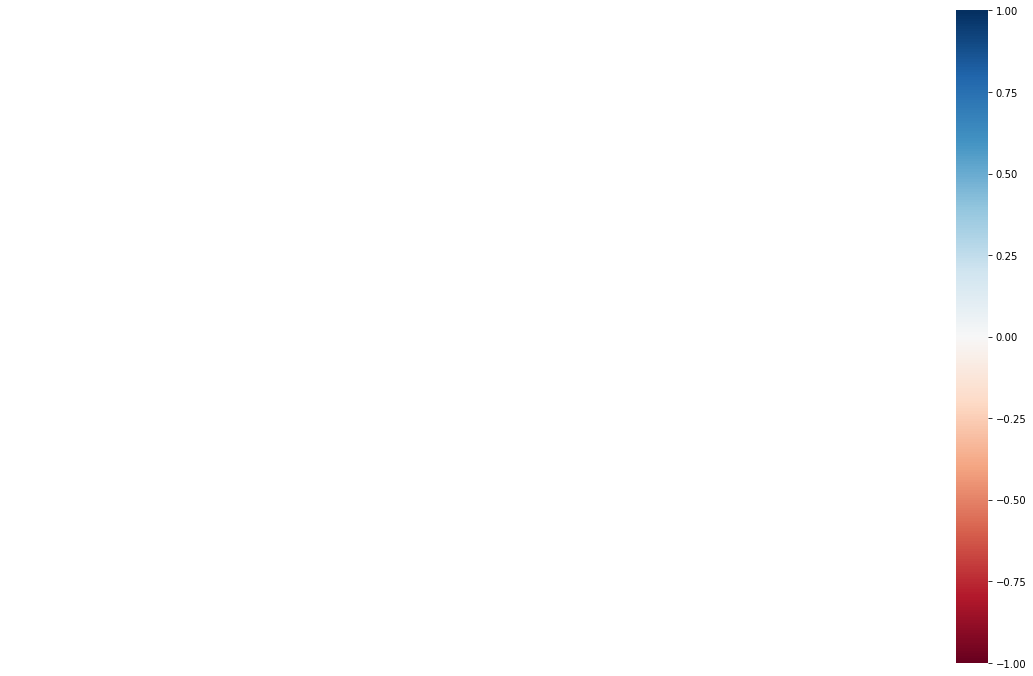

In [57]:
#checking for null values
msno.heatmap(DD) 

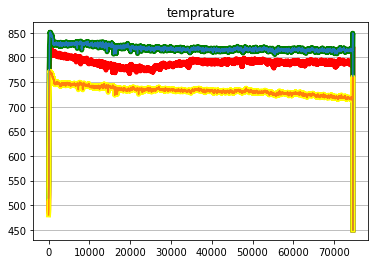

In [58]:
import matplotlib.pyplot as plt

import matplotlib.pyplot as plt
import numpy as np
y0= DD['Kimstream Distance (cm)']
y1 = DD['Temp. left optical probe']
y2 = DD['Temp. center optical probe']
y3=  DD['Temp. right optical probe']
plt.plot(y1,color='red',  
         linewidth=5.0 ,label = 'Temp. left optical probe')
plt.plot(y2,color='green',  
         linewidth=5.0 ,label = 'Temp. center optical probe')
plt.plot(y3,color='yellow',  
         linewidth=5.0 ,label = 'Temp. right optical probe')
plt.plot(y2, label = 'Temp. left optical probe')
plt.plot(y3,label = 'Temp. left optical probe')
#plt.plot(y1,y2,y3)
plt.title('temprature')
plt.grid(axis='y')

plt.show()

# First 7 columns 
Chaning the dtype for interpolation

In [77]:
D = D.astype(str).astype(float)

In [80]:
#nan values
D.interpolate(method='linear', limit_direction='forward', axis=0)

1,Kimstream Distance (cm),Temp. left optical probe,Temp. center optical probe,Temp. right optical probe,current (A),Power,voltage
2,0.00000,486.218,514.836,480.418,13.705,229.09278,16.716
3,0.01320,486.616,515.156,480.506,13.703,229.16897,16.724
4,0.03980,486.821,515.448,480.993,13.698,229.07165,16.723
5,0.06613,487.092,515.737,481.090,13.698,229.03056,16.720
6,0.09393,487.540,516.246,481.007,13.687,228.98351,16.730
...,...,...,...,...,...,...,...
114296,1982.40087,450.000,450.000,450.000,0.000,0.00000,0.019
114297,1982.40087,450.000,450.000,450.000,0.000,0.00000,0.019
114298,1982.40087,450.000,450.000,450.000,0.000,0.00000,0.019
114299,1982.40087,450.000,450.000,450.000,0.000,0.00000,0.019


In [86]:
DD.isna().sum() # the samller datafraem wihtout interpolation

1
Kimstream Distance (cm)       0
Temp. left optical probe      0
Temp. center optical probe    0
Temp. right optical probe     0
current (A)                   0
Power                         0
voltage                       0
dtype: int64

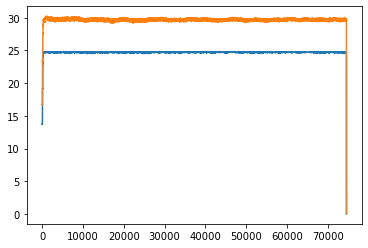

In [88]:
#voltage and current being directly proportional to each other.
c= DD['current (A)']
v = DD['voltage']
plt.plot(c, label = 'Temp. left optical probe')
plt.plot(v,label = 'Temp. left optical probe')
#plt.plot(y1,y2,y3)
plt.show()

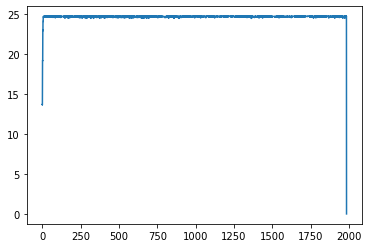

In [89]:

plt.plot(DD['Kimstream Distance (cm)'], c)
plt.show()

# The next 5 rows from 7 to 12
checking for null values 

In [75]:
D_ = data2.iloc[:,8:13]
D_.isna().sum()

1
Distance (cm)    0
gasflow          0
liquidflow       0
tongas           0
tonliquid        0
dtype: int64

<AxesSubplot:xlabel='1'>

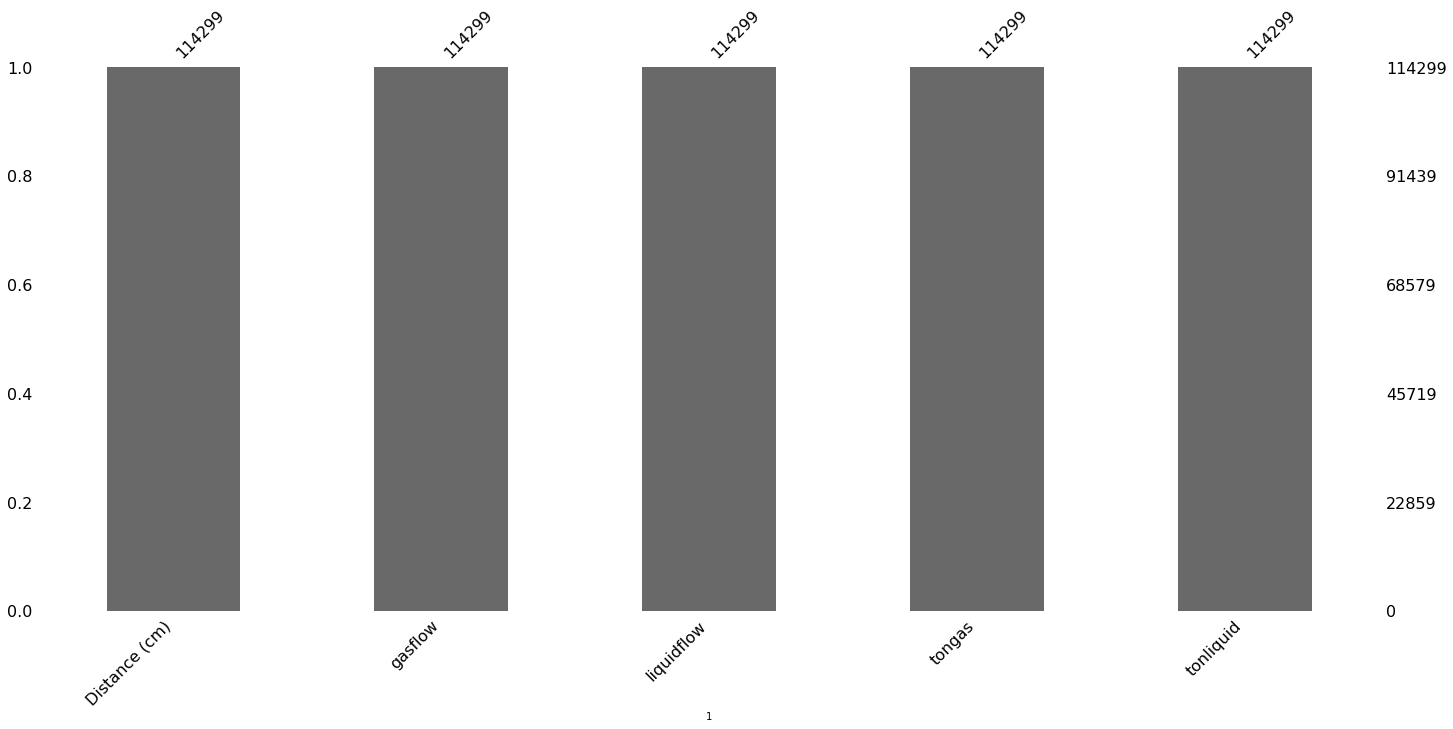

In [76]:
msno.bar(D_)

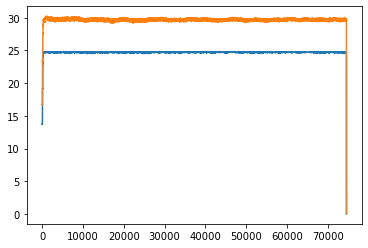